## Model 1 Fit Results

In [1]:
# results from model with subset of FIPS - no imputation

In [2]:
setwd("/global/project/projectdirs/m1532/Projects_MVP/geospatial/GeoSpatial_Model/spatial-prediction")

In [3]:
library(CARBayesST)
library(tidyverse)

Loading required package: MASS

Loading required package: Rcpp

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


In [4]:
fit1 <- readRDS("outputs/model_results/model_2022-09-02.rds")

In [5]:
#get fips to keep 

# Note: United States total includes 3,006 counties;
## Loading dataset and geometries ###
vars <- read_csv("data/processed/combined.csv")
# change this to the number of years that 
# you are considering in your dataset.
NUMBER_OF_YEARS <- length(unique(vars$year))


county <- sf::read_sf(
    dsn = "data/shapefile/cb_2020_us_tract_500k",
    layer = "cb_2020_us_tract_500k"
)

county <- county %>%
    mutate(FIPSCODE = paste0(STATEFP, COUNTYFP)) %>% 
    arrange(FIPSCODE) %>%
    distinct(FIPSCODE, .keep_all = TRUE)

df <- county %>% inner_join(vars, on=FIPSCODE)

df_nona <- df %>% na.omit(suicide_rate) %>%
  group_by(FIPSCODE) %>% 
  mutate(name_count = n()) %>%
  ungroup() %>% 
  filter(name_count == NUMBER_OF_YEARS) %>% 
  dplyr::select(-name_count) %>%
  arrange(desc(year), FIPSCODE)

fips_to_keep <- df_nona %>% 
    distinct(FIPSCODE) %>% 
    pull(FIPSCODE)


Rows: 9089 Columns: 103
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): FIPSCODE, county
dbl (101): deaths, ACS_PCT_GRP_QRT, ACS_PCT_PRIVATE_2, mean_temp, ACS_PCT_ME...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“PROJ: proj_identify: Open of /global/homes/b/bbrusco/.conda/envs/r-venv/share/proj failed (GDAL error 1)”
Joining, by = "FIPSCODE"


In [7]:
fit1$summary.results

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
(Intercept),-9.5651,-11.3382,-8.0104,70000,43.4,73.0,0.4
ALAND,0.0000,0.0000,0.0000,70000,43.4,0.0,Inf
AWATER,0.0000,0.0000,0.0000,70000,43.4,0.0,-Inf
ACS_PCT_GRP_QRT,1.4603,0.6908,2.1821,70000,43.4,179.0,-2.3
ACS_PCT_PRIVATE_2,0.7768,-1.1633,2.6331,70000,43.4,662.6,-0.7
mean_temp,0.1270,-0.1204,0.3612,70000,43.4,163.5,-0.1
ACS_PCT_MEDICARE_ONLY,0.4798,-0.8665,1.8631,70000,43.4,237.5,0.8
ACS_PCT_PRIVATE_SELF,1.7209,0.9284,2.5207,70000,43.4,211.6,0.1
ACS_PCT_MOBILE_HOME,0.2467,-0.0494,0.5288,70000,43.4,215.6,-0.2
NHC_DAILY_RES,-1.3728,-1.8542,-0.8949,70000,43.4,53.3,-2.0


In [22]:
str(fit1$samples)

List of 6
 $ beta  : 'mcmc' num [1:70000, 1:99] -10.5 -10.5 -10.6 -10.7 -10.6 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ phi   : 'mcmc' num [1:70000, 1:9087] -0.147 -0.255 -0.258 -0.26 -0.477 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ rho   : 'mcmc' num [1:70000, 1:2] 0.499 0.495 0.515 0.512 0.497 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "rho.S" "rho.T"
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ tau2  : 'mcmc' num [1:70000, 1] 0.165 0.168 0.165 0.165 0.167 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ fitted: 'mcmc' num [1:70000, 1:9087] 13.04 11.65 11.49 11.41 9.21 ...
  ..- attr(*, "mcpar")= num [1:3] 1 70000 1
 $ Y     : 'mcmc' logi NA
  ..- attr(*, "mcpar")= num [1:3] 1 1 1


In [10]:
length(fit1$samples$rho)

[1] 140000

In [9]:
true_values <- read_csv("data/raw/suicide/2018.csv", show_col_types=F) %>%
        filter(fips %in% fips_to_keep) %>%
        arrange(fips) %>%
        select(Deaths) %>%
        pull()


In [11]:
fitted_values <- fit1$fitted[6059:9087]

In [12]:
results_df <- tibble(
    fitted_values = fitted_values,
    true_values = true_values,
    FIPSCODE = fips_to_keep
)


In [13]:
top_true <- results_df %>%
    arrange(desc(true_values)) %>%
    head(6) %>%
    mutate(top5_true = 1)
top_true

fitted_values,true_values,FIPSCODE,top5_true
<dbl>,<dbl>,<chr>,<dbl>
843.7987,947,06037,1
690.0795,737,04013,1
489.9199,481,48201,1
418.0826,465,32003,1
425.1484,459,17031,1
415.1385,448,06073,1


In [14]:
top_fitted <- results_df %>%
    arrange(desc(fitted_values)) %>%
    head(6)
top_fitted

fitted_values,true_values,FIPSCODE
<dbl>,<dbl>,<chr>
843.7987,947,06037
690.0795,737,04013
489.9199,481,48201
425.1484,459,17031
418.0826,465,32003
415.1385,448,06073


# Coefficients
Order by effect size of the coefficient (note: coefficients have not been standardized)

In [31]:
fit1$summary %>%
    as_tibble(rownames=NA) %>%
    arrange(desc(abs(Mean)))

,Mean,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-9.5651,-11.3382,-8.0104,70000,43.4,73.0,0.4
ACS_PCT_1UP_PERS_1ROOM,7.0484,2.6850,10.6888,70000,43.4,28.8,-5.0
ACS_PCT_1UP_OWNER_1ROOM,-5.8832,-8.2126,-2.0005,70000,43.4,12.5,2.1
ACS_TOTAL_HOUSEHOLD,-5.5717,-6.5588,-4.2039,70000,43.4,3.8,10.6
CHR_DENTISTS_NUM,5.0255,3.7770,6.1722,70000,43.4,4.4,-8.9
ACS_PCT_WHOLESALE,4.7574,3.1270,6.2979,70000,43.4,423.2,1.6
CCBP_RATE_CS_PER_1000,-4.7565,-9.8555,-0.4497,70000,43.4,31.8,-0.9
ACS_PCT_UNINSURED,4.4150,0.7697,7.8586,70000,43.4,5.8,3.6
ACS_PCT_PRIVATE_MDCR,-4.3516,-5.9855,-2.6026,70000,43.4,245.6,1.0


# Residuals Analysis

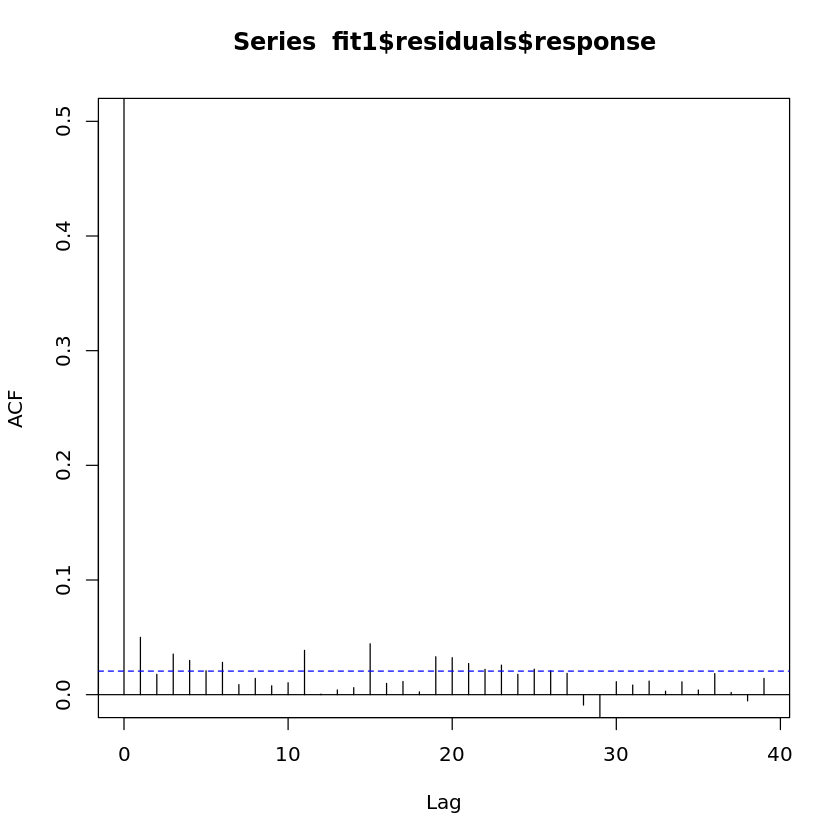

In [24]:
acf(fit1$residuals$response,type="correlation",ylim=c(0,0.5))

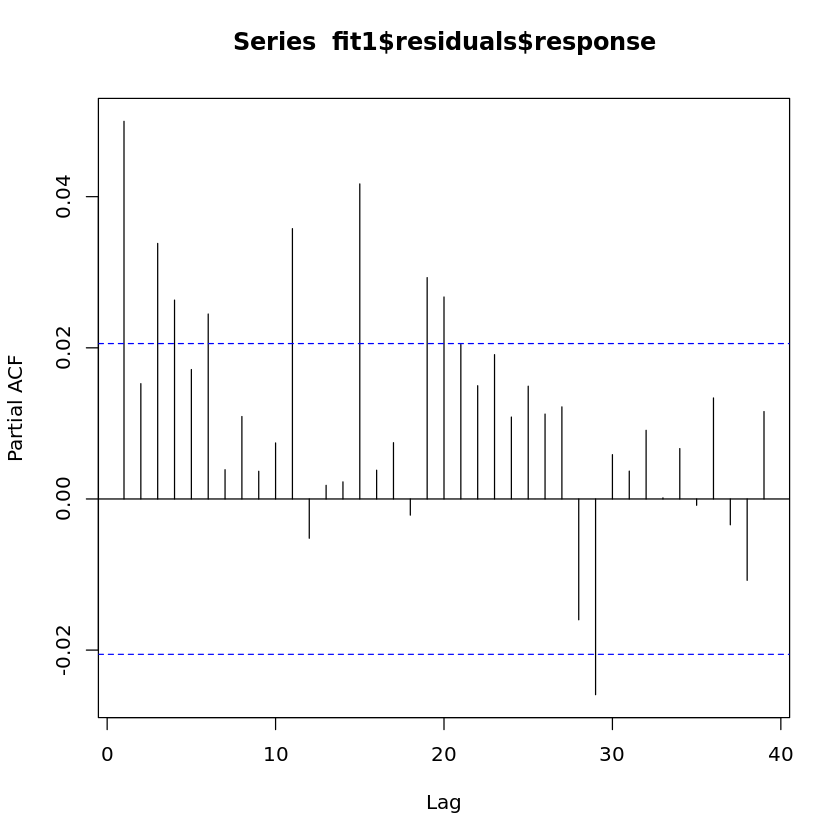

In [28]:
acf(fit1$residuals$response,type="partial")

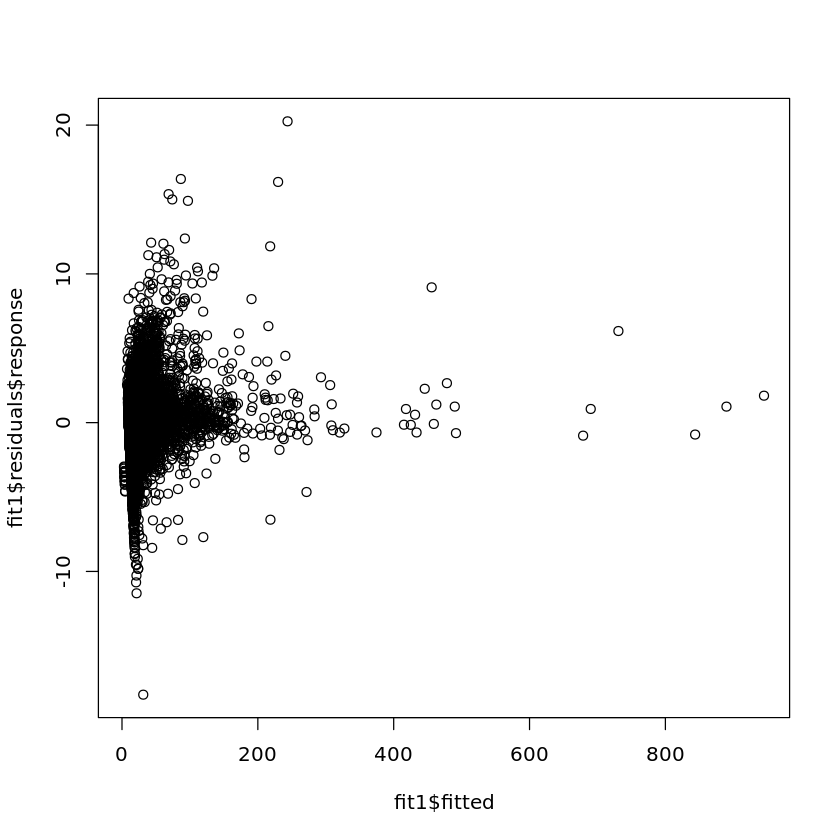

In [33]:
plot(fit1$fitted, fit1$residuals$response)
# some residual correlation is still present - can try AR2

# RMSE

In [27]:
caret::RMSE(fitted_values,true_values)

[1] 13.70145